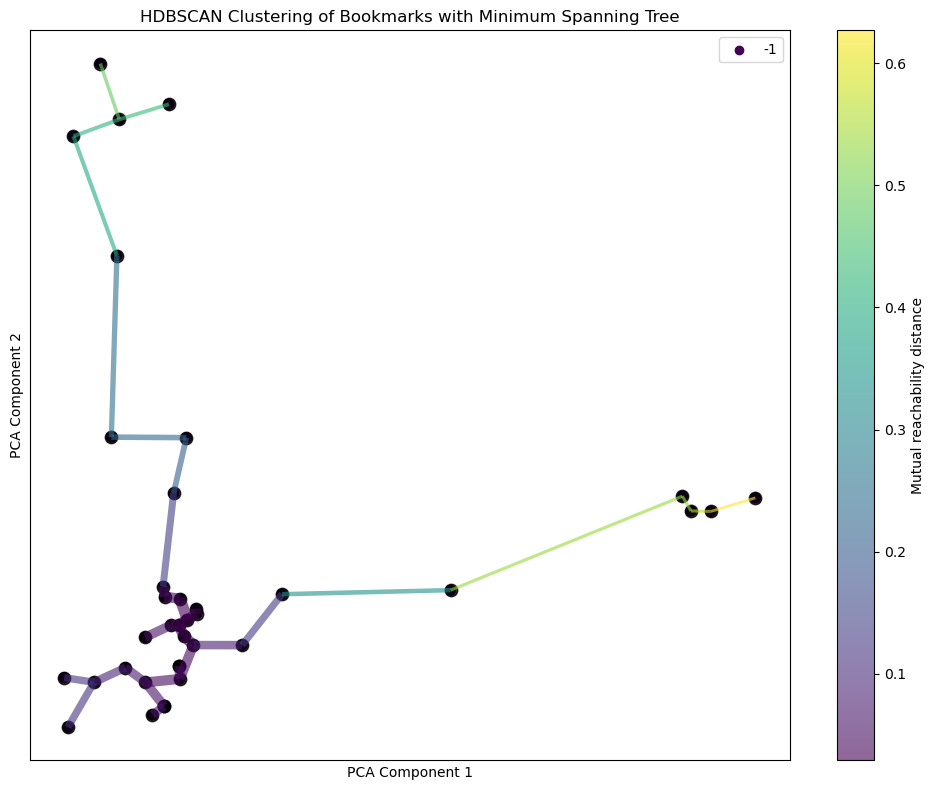

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import json

with open('tagged_data.json') as file:
    bookmarks = json.load(file)

# Preprocess the bookmarks data
bookmarks_data = [{"name": bookmark["name"], "url": bookmark["url"], "tags": " ".join(bookmark["tags"])} for bookmark in bookmarks]

# Extract features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform([bookmark["tags"] for bookmark in bookmarks_data])

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features.toarray())

# Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(reduced_features)

# Visualize the clustering results
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=clusterer.labels_, palette='viridis', s=80, linewidths=0, ax=ax)

# Plot the minimum spanning tree
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('HDBSCAN Clustering of Bookmarks with Minimum Spanning Tree')
plt.tight_layout()
plt.show()

<Axes: ylabel='distance'>

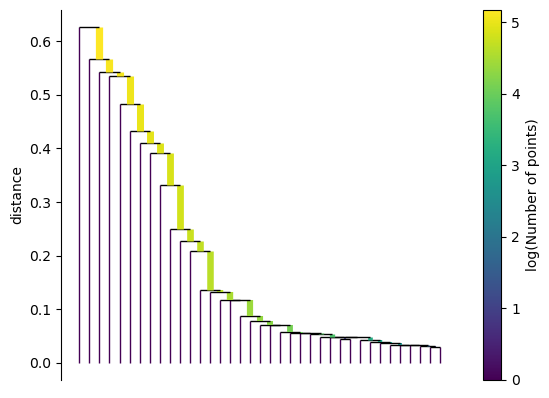

In [14]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<Axes: ylabel='$\\lambda$ value'>

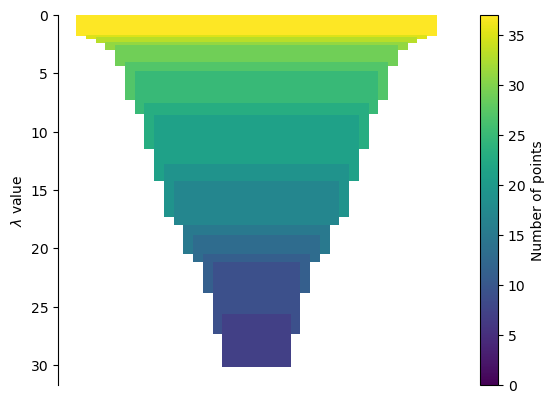

In [15]:
clusterer.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

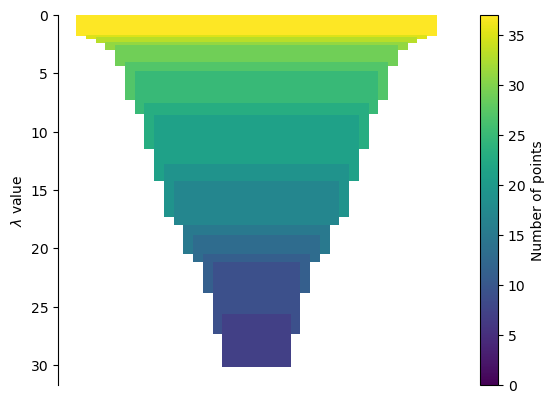

In [16]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())